In [2]:
from ni_eeg_forward_project.util import get_labels_of_points, plot_glassbrain_projections
from ni_eeg_forward_project.util import downsample_leadfield_matrix
import mne
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from neurolib.utils.collections import dotdict
import numpy as np

In [3]:
fname = "../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif"
fwd = mne.read_forward_solution(fname)

Reading forward solution from /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/playground_dev/../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif...
    Reading a source space...
    [done]
    1 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (14629 sources, 94 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [4]:
print(fwd.keys())
fwd['src'][0].keys()

dict_keys(['source_ori', 'coord_frame', 'nsource', 'nchan', 'sol', '_orig_sol', 'sol_grad', 'mri_head_t', 'info', 'src', 'source_rr', '_orig_source_ori', 'source_nn', 'surf_ori'])


dict_keys(['id', 'type', 'shape', 'src_mri_t', 'mri_ras_t', 'vox_mri_t', 'mri_width', 'mri_height', 'mri_depth', 'mri_volume_name', 'neighbor_vert', 'np', 'ntri', 'coord_frame', 'rr', 'nn', 'tris', 'nuse', 'inuse', 'vertno', 'nuse_tri', 'use_tris', 'nearest', 'nearest_dist', 'pinfo', 'patch_inds', 'dist', 'dist_limit', 'subject_his_id'])

In [5]:
hem = fwd['src'][0]
dip_pos = hem['rr'][hem['vertno']]  # The position of the dipoles
dip_ori = hem['nn'][hem['vertno']]
print(dip_pos.shape)
print(dip_ori.shape)
print(np.sum(dip_ori[0,:]))

(14629, 3)
(14629, 3)
1.0552237090596464


In [6]:
leadfield = fwd['sol']['data']
leadfield.shape

(94, 43887)

In [7]:
# dip_pos = dip_pos*1e3   # ARE COORDINATES DEFINED IN m IN MNE???

In [8]:
points_found, label_codes, label_strings = get_labels_of_points(dip_pos*1e3, atlas="aal2")
if not np.all(points_found):
    print("Not all sources were assigned to regions.")

print(label_codes.shape)

ERROR:root:The atlas does not specivy valid labels for all the given points.
Total number of points: (14629) out of which (14236) were validly assigned.


Not all sources were assigned to regions.
(14629,)


In [9]:
not_found_indices = np.where(np.array(points_found) == False)

In [10]:
not_found_indices[0].shape

(393,)

In [12]:
sum(label_codes>0)

5849

In [17]:
dip_pos[np.where(label_codes>0)[0]].shape

(5849, 3)

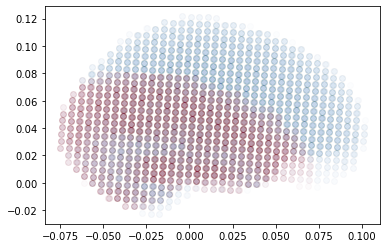

In [26]:
# plot all sources that fell into valid & non-CSF regions
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o', alpha=0.01)
plt.plot(dip_pos[np.where(label_codes>0)[0], 1], dip_pos[np.where(label_codes>0)[0], 2], 'ro',alpha=0.01)

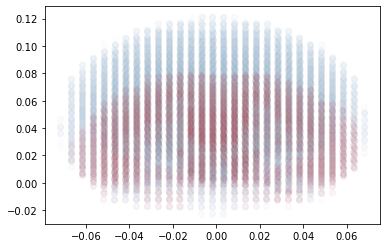

In [24]:
# plot all sources that fell into valid & non-CSF regions
plt.plot(dip_pos[:, 0], dip_pos[:, 2], 'o', alpha=0.01)
plt.plot(dip_pos[np.where(label_codes>0)[0], 0], dip_pos[np.where(label_codes>0)[0], 2], 'ro',alpha=0.01)

In [36]:
# e.g. coordinates -0.02, 0.025, 0.10 should have sth.
# get_labels_of_points(np.array((0.02, 0.025, 0.10)).reshape((1,3))*1e3, atlas="aal2")
center = np.array((0.02, 0.025, 0.10))#.reshape((1,3))
radius = 0.01
x = np.linspace(center[0]-radius, center[0]+radius, 50).reshape((-1,1))
y = np.linspace(center[1]-radius, center[1]+radius, 50).reshape((-1,1))
z = np.linspace(center[2]-radius, center[2]+radius, 50).reshape((-1,1))


get_labels_of_points(np.hstack((x,y,z))*1e3, atlas="aal2")

([True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''])

In [43]:
x = np.linspace(-90, 90, 100)
y = np.linspace(-126, 90, 100)
z = np.linspace(-72, 108 ,100)

yy, zz = np.meshgrid(y, z)

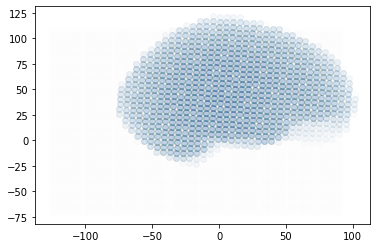

In [45]:
plt.plot(yy, zz, "x", alpha =0.005)
plt.plot(dip_pos[:, 1]*1e3, dip_pos[:, 2]*1e3, 'o', alpha=0.01)

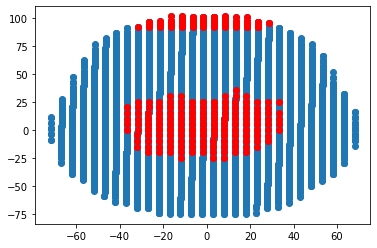

In [16]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 0], dip_pos[:, 1], 'o')
plt.plot(dip_pos[not_found_indices[0], 0], dip_pos[not_found_indices[0], 1], 'ro')

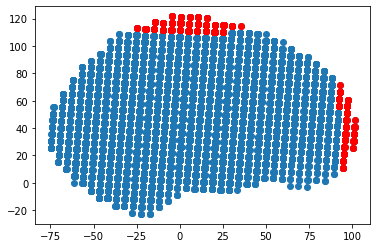

In [17]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o')
plt.plot(dip_pos[not_found_indices[0], 1], dip_pos[not_found_indices[0], 2], 'ro')

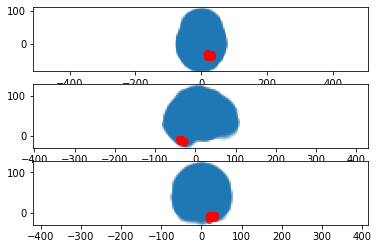

In [22]:
plot_glassbrain_projections(fwd, label_codes, 4112, "");

### Why are there three times as many columns as there are dipoles and how are the dipoles sorted?

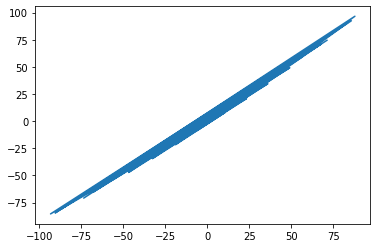

In [11]:
plt.plot(leadfield[:, 0], leadfield[:, 3])

In [21]:
print(np.dot(leadfield[:, 0], leadfield[:, 0]))
print(np.dot(leadfield[:, 0], leadfield[:, 1]))
print(np.dot(leadfield[:, 0], leadfield[:, 2]))
print(np.dot(leadfield[:, 0], leadfield[:, 3]))
print(np.dot(leadfield[:, 0], leadfield[:, 4]))

163186.72
3916.299
-1498.74
163503.4
-6487.4355


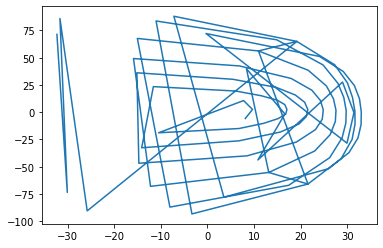

In [19]:
plt.plot(leadfield[:, 2], leadfield[:, 0])

### Assign dipoles-xyz to regions

### Test downsampling

In [34]:
ds_everything = downsample_leadfield_matrix(leadfield, label_codes)

In [37]:
ds_everything[2]

array([[ 68.61825562,  52.39718628, 111.71192932, ...,  28.78284454,
         32.81113434,  34.81182861],
       [ 63.24255753,  60.60943604, 107.2014389 , ...,  29.20792198,
         33.11088562,  35.38224411],
       [ 54.73020935,  66.03462982,  91.07171631, ...,  29.1109848 ,
         32.76096344,  35.15696335],
       ...,
       [-15.80848217, -33.06074524, -23.08837128, ..., -17.83277893,
         -8.65104771,  -0.67061156],
       [ -4.87483072,  -3.58199835, -21.35296822, ...,  11.62473106,
         12.79399204,  13.20175076],
       [ -3.82268023,  -2.1142087 ,  -9.09934425, ...,   3.98162389,
          8.407897  ,  13.33716393]])

In [40]:
print(np.min(leadfield), np.max(leadfield), np.mean(leadfield))

-696.64154 667.87744 2.6326315


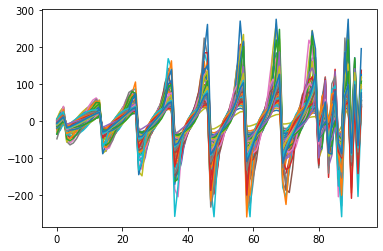

In [50]:
plt.plot(ds_everything[1])

In [44]:
# np.save("x_orientation", ds_everything[0])
# np.save("y_orientation", ds_everything[1])
# np.save("z_orientation", ds_everything[2])